In [1]:
import pymongo
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)


In [2]:
client = pymongo.MongoClient('mongodb://localhost:27017/')
db = client['covid19']
collection = db['covid19']


In [3]:
collection.find_one()

{'_id': ObjectId('644a374c8c09c4e7024a5be7'),
 'Data As Of': '04/26/2023',
 'Start Date': '01/01/2020',
 'End Date': '04/22/2023',
 'Group': 'By Total',
 'Year': 0,
 'Month': 0,
 'State': 'United States',
 'Sex': 'All Sexes',
 'Age Group': 'All Ages',
 'COVID-19 Deaths': 1127855,
 'Total Deaths': 11051061,
 'Pneumonia Deaths': 1092804,
 'Pneumonia and COVID-19 Deaths': 562258,
 'Influenza Deaths': 21520,
 'Pneumonia, Influenza, or COVID-19 Deaths': 1677497,
 'Footnote': ''}

In [4]:
df = pd.DataFrame(list(collection.find()))
df.head()

,_id,Data As Of,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
0,644a374c8c09c4e7024a5be7,04/26/2023,01/01/2020,04/22/2023,By Total,0,0,United States,All Sexes,All Ages,1127855,11051061,1092804,562258,21520,1677497,
1,644a374c8c09c4e7024a5be8,04/26/2023,01/01/2020,04/22/2023,By Total,0,0,United States,All Sexes,Under 1 year,476,64866,912,83,58,1361,
2,644a374c8c09c4e7024a5be9,04/26/2023,01/01/2020,04/22/2023,By Total,0,0,United States,All Sexes,0-17 years,1596,115515,2557,403,467,4195,
3,644a374c8c09c4e7024a5bea,04/26/2023,01/01/2020,04/22/2023,By Total,0,0,United States,All Sexes,1-4 years,263,12468,574,63,160,926,
4,644a374c8c09c4e7024a5beb,04/26/2023,01/01/2020,04/22/2023,By Total,0,0,United States,All Sexes,5-14 years,482,19428,718,138,201,1252,


In [5]:
df.shape

(123930, 17)

In [6]:
df.isnull().sum()

_id                                         0
Data As Of                                  0
Start Date                                  0
End Date                                    0
Group                                       0
Year                                        0
Month                                       0
State                                       0
Sex                                         0
Age Group                                   0
COVID-19 Deaths                             0
Total Deaths                                0
Pneumonia Deaths                            0
Pneumonia and COVID-19 Deaths               0
Influenza Deaths                            0
Pneumonia, Influenza, or COVID-19 Deaths    0
Footnote                                    0
dtype: int64

In [7]:
df.drop(['Year', 'Month', 'Footnote'], axis = 1, inplace=True)
df.head()

,_id,Data As Of,Start Date,End Date,Group,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
0,644a374c8c09c4e7024a5be7,04/26/2023,01/01/2020,04/22/2023,By Total,United States,All Sexes,All Ages,1127855,11051061,1092804,562258,21520,1677497
1,644a374c8c09c4e7024a5be8,04/26/2023,01/01/2020,04/22/2023,By Total,United States,All Sexes,Under 1 year,476,64866,912,83,58,1361
2,644a374c8c09c4e7024a5be9,04/26/2023,01/01/2020,04/22/2023,By Total,United States,All Sexes,0-17 years,1596,115515,2557,403,467,4195
3,644a374c8c09c4e7024a5bea,04/26/2023,01/01/2020,04/22/2023,By Total,United States,All Sexes,1-4 years,263,12468,574,63,160,926
4,644a374c8c09c4e7024a5beb,04/26/2023,01/01/2020,04/22/2023,By Total,United States,All Sexes,5-14 years,482,19428,718,138,201,1252


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123930 entries, 0 to 123929
Data columns (total 14 columns):
 #   Column                                    Non-Null Count   Dtype 
---  ------                                    --------------   ----- 
 0   _id                                       123930 non-null  object
 1   Data As Of                                123930 non-null  object
 2   Start Date                                123930 non-null  object
 3   End Date                                  123930 non-null  object
 4   Group                                     123930 non-null  object
 5   State                                     123930 non-null  object
 6   Sex                                       123930 non-null  object
 7   Age Group                                 123930 non-null  object
 8   COVID-19 Deaths                           123930 non-null  int64 
 9   Total Deaths                              123930 non-null  int64 
 10  Pneumonia Deaths                

In [9]:
df.describe()

,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
count,1.239300e+05,1.239300e+05,1.239300e+05,123930.000000,123930.000000,1.239300e+05
mean,2.447986e+02,2.434523e+03,2.371404e+02,122.675793,4.343960,3.635995e+02
std,5.270542e+03,4.994246e+04,5.040661e+03,2664.904039,101.985824,7.735282e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,0.000000e+00,2.000000e+01,0.000000e+00,0.000000,0.000000,0.000000e+00
50%,0.000000e+00,1.030000e+02,0.000000e+00,0.000000,0.000000,0.000000e+00
75%,2.800000e+01,5.200000e+02,3.900000e+01,12.000000,0.000000,5.700000e+01
max,1.127855e+06,1.105106e+07,1.092804e+06,562258.000000,21520.000000,1.677497e+06


## Visualizations

In [10]:
def clean_name(name):
    return name.lower().strip().replace(" ", "_").replace(",", "_").replace("-", "_")

In [11]:
df.rename(columns=clean_name, inplace=True)
df.head()

,_id,data_as_of,start_date,end_date,group,state,sex,age_group,covid_19_deaths,total_deaths,pneumonia_deaths,pneumonia_and_covid_19_deaths,influenza_deaths,pneumonia__influenza__or_covid_19_deaths
0,644a374c8c09c4e7024a5be7,04/26/2023,01/01/2020,04/22/2023,By Total,United States,All Sexes,All Ages,1127855,11051061,1092804,562258,21520,1677497
1,644a374c8c09c4e7024a5be8,04/26/2023,01/01/2020,04/22/2023,By Total,United States,All Sexes,Under 1 year,476,64866,912,83,58,1361
2,644a374c8c09c4e7024a5be9,04/26/2023,01/01/2020,04/22/2023,By Total,United States,All Sexes,0-17 years,1596,115515,2557,403,467,4195
3,644a374c8c09c4e7024a5bea,04/26/2023,01/01/2020,04/22/2023,By Total,United States,All Sexes,1-4 years,263,12468,574,63,160,926
4,644a374c8c09c4e7024a5beb,04/26/2023,01/01/2020,04/22/2023,By Total,United States,All Sexes,5-14 years,482,19428,718,138,201,1252


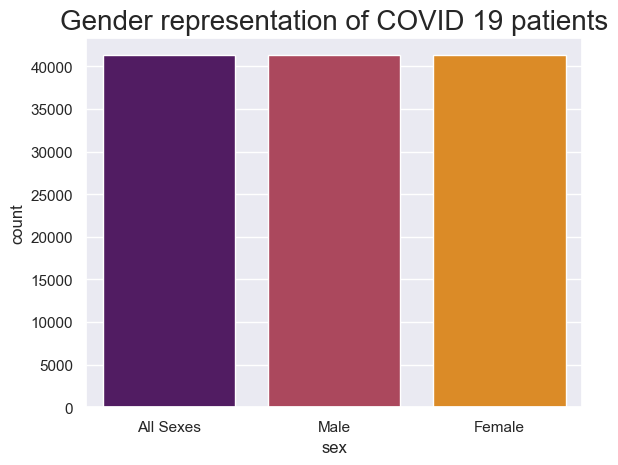

In [12]:
sns.set()
plt.title("Gender representation of COVID 19 patients", fontdict={'fontsize': 20})
sns.countplot(df.sex, palette="inferno")
plt.show()

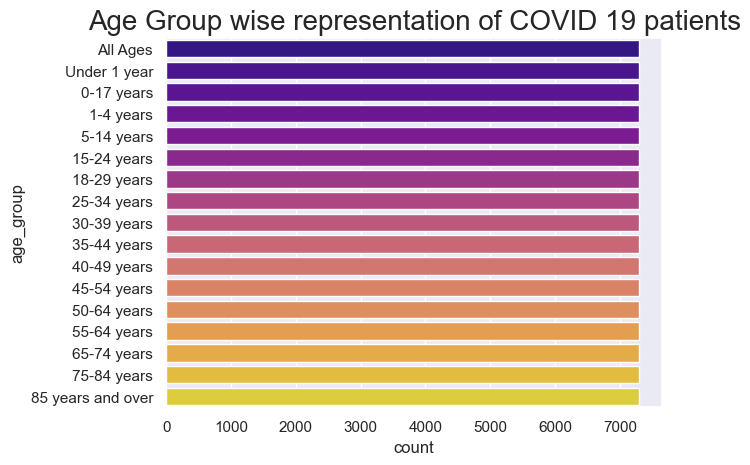

In [13]:
sns.set()
plt.title("Age Group wise representation of COVID 19 patients", fontdict={'fontsize': 20})
sns.countplot(y=df.age_group, palette="plasma")
plt.show()


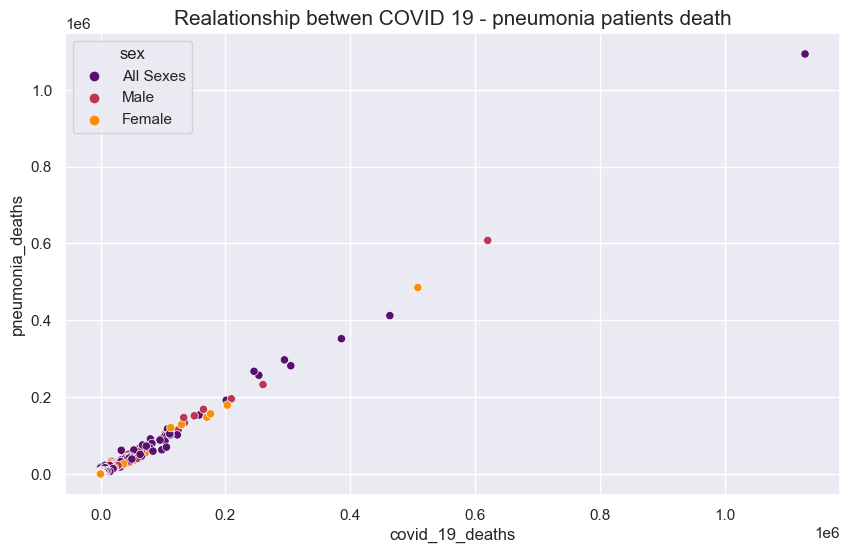

In [14]:
sns.set()
plt.figure(figsize =  (10,6))
plt.title("Realationship betwen COVID 19 - pneumonia patients death", fontdict={'fontsize': 15})
sns.scatterplot(x = "covid_19_deaths", y = "pneumonia_deaths", data= df, palette="inferno", hue = "sex")
plt.show()

In [15]:
state = df.groupby("state")["covid_19_deaths"].count().reset_index().sort_values(by = "covid_19_deaths", ascending= False)[:5]

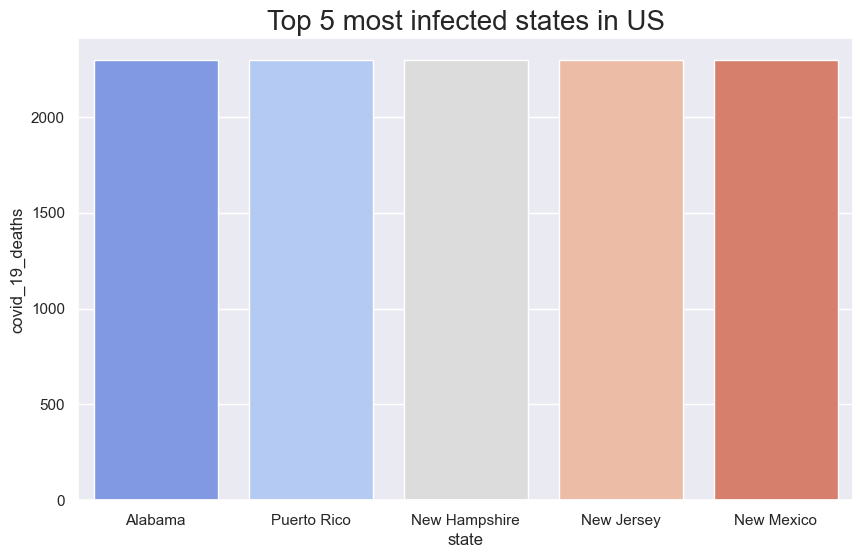

In [16]:
sns.set()
plt.figure(figsize =  (10,6))
plt.title("Top 5 most infected states in US", fontdict={'fontsize': 20})
sns.barplot(x = "state", y ="covid_19_deaths", data = state, palette="coolwarm")
plt.show()

In [17]:
df["age_group_new"] = ""

# Group age groups into larger categories
df.loc[df["age_group"].isin(["Under 1 year", "0-17 years", "1-4 years", "5-14 years"]), "age_group_new"] = "Under 18 years"
df.loc[df["age_group"].isin(["18-29 years", "30-39 years", "40-49 years"]), "age_group_new"] = "18-49 years"
df.loc[df["age_group"].isin(["50-64 years"]), "age_group_new"] = "50-64 years"
df.loc[df["age_group"].isin(["65-74 years", "75-84 years", "85 years and over"]), "age_group_new"] = "65 years and over"

In [18]:
df.head()

,_id,data_as_of,start_date,end_date,group,state,sex,age_group,covid_19_deaths,total_deaths,pneumonia_deaths,pneumonia_and_covid_19_deaths,influenza_deaths,pneumonia__influenza__or_covid_19_deaths,age_group_new
0,644a374c8c09c4e7024a5be7,04/26/2023,01/01/2020,04/22/2023,By Total,United States,All Sexes,All Ages,1127855,11051061,1092804,562258,21520,1677497,
1,644a374c8c09c4e7024a5be8,04/26/2023,01/01/2020,04/22/2023,By Total,United States,All Sexes,Under 1 year,476,64866,912,83,58,1361,Under 18 years
2,644a374c8c09c4e7024a5be9,04/26/2023,01/01/2020,04/22/2023,By Total,United States,All Sexes,0-17 years,1596,115515,2557,403,467,4195,Under 18 years
3,644a374c8c09c4e7024a5bea,04/26/2023,01/01/2020,04/22/2023,By Total,United States,All Sexes,1-4 years,263,12468,574,63,160,926,Under 18 years
4,644a374c8c09c4e7024a5beb,04/26/2023,01/01/2020,04/22/2023,By Total,United States,All Sexes,5-14 years,482,19428,718,138,201,1252,Under 18 years


In [19]:
# Deleting the unnecessary  columns 
df.drop(['_id', 'data_as_of', 'start_date', 'group', 'state', 'age_group', 'sex','end_date'], axis = 1, inplace=True)
df.head()

,covid_19_deaths,total_deaths,pneumonia_deaths,pneumonia_and_covid_19_deaths,influenza_deaths,pneumonia__influenza__or_covid_19_deaths,age_group_new
0,1127855,11051061,1092804,562258,21520,1677497,
1,476,64866,912,83,58,1361,Under 18 years
2,1596,115515,2557,403,467,4195,Under 18 years
3,263,12468,574,63,160,926,Under 18 years
4,482,19428,718,138,201,1252,Under 18 years


In [20]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['age_group_new']=encoder.fit_transform(df['age_group_new'])
df.head()

,covid_19_deaths,total_deaths,pneumonia_deaths,pneumonia_and_covid_19_deaths,influenza_deaths,pneumonia__influenza__or_covid_19_deaths,age_group_new
0,1127855,11051061,1092804,562258,21520,1677497,0
1,476,64866,912,83,58,1361,4
2,1596,115515,2557,403,467,4195,4
3,263,12468,574,63,160,926,4
4,482,19428,718,138,201,1252,4


## Spliting dataset

In [21]:
from sklearn.model_selection import train_test_split
X = df.drop(columns= 'age_group_new', axis = 1)
y = df['age_group_new']
print("Shape of X: ",X.shape)
print("Shape of y: ",y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)


print("Shapes of X_train and X_test: ",X_train.shape, X_test.shape)
print("Shape of y_train and y_test: ",y_train.shape, y_test.shape)

Shape of X:  (123930, 6)
Shape of y:  (123930,)
Shapes of X_train and X_test:  (99144, 6) (24786, 6)
Shape of y_train and y_test:  (99144,) (24786,)


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
lr = LogisticRegression()
lr.fit(X_train, y_train)

X_train_predict = lr.predict(X_train)
y_pred = lr.predict(X_test)
training_data_accuracy = accuracy_score(X_train_predict, y_train)
print("Train accuracy is : ", training_data_accuracy)

Train accuracy is :  0.3278967965787138


In [23]:
y_pred = lr.predict(X_test)
y=y_test
test_data_accuracy = accuracy_score(y,y_pred)
print("Test accuracy is : ", test_data_accuracy)

Test accuracy is :  0.3339385136770758



 Classification report

              precision    recall  f1-score   support

           0       0.31      0.29      0.30      8797
           1       0.40      0.09      0.15      4362
           2       0.14      0.10      0.12      1422
           3       0.52      0.57      0.55      4413
           4       0.27      0.45      0.34      5792

    accuracy                           0.33     24786
   macro avg       0.33      0.30      0.29     24786
weighted avg       0.35      0.33      0.32     24786



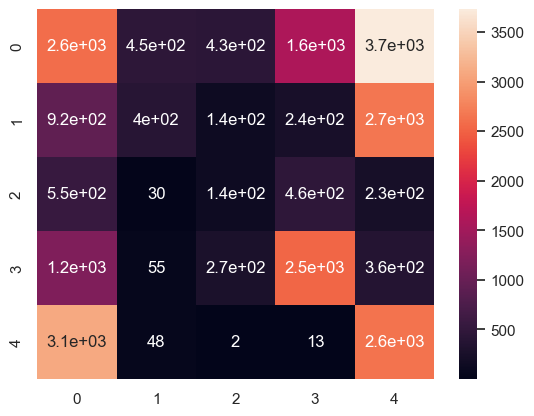

In [24]:
cm = confusion_matrix(y,y_pred)
sns.heatmap(cm, annot=True)
print("\n Classification report\n")
print(classification_report(y,y_pred))

## Decision Tree Classifier

In [25]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dt_clf = dtc.fit(X_train,y_train)
X_train_predict = dtc.predict(X_train)
training_data_accuracy = accuracy_score(X_train_predict, y_train)
print("Train accuracy is : ", training_data_accuracy)

Train accuracy is :  0.7307956104252401


In [26]:
y_pred = dtc.predict(X_test)
y=y_test
test_data_accuracy = accuracy_score(y,y_pred)
print("Test accuracy is : ", test_data_accuracy)

Test accuracy is :  0.4701847817316227



 Classification report

              precision    recall  f1-score   support

           0       0.43      0.55      0.48      8797
           1       0.29      0.13      0.18      4362
           2       0.16      0.14      0.15      1422
           3       0.51      0.45      0.48      4413
           4       0.65      0.69      0.67      5792

    accuracy                           0.47     24786
   macro avg       0.41      0.39      0.39     24786
weighted avg       0.45      0.47      0.45     24786



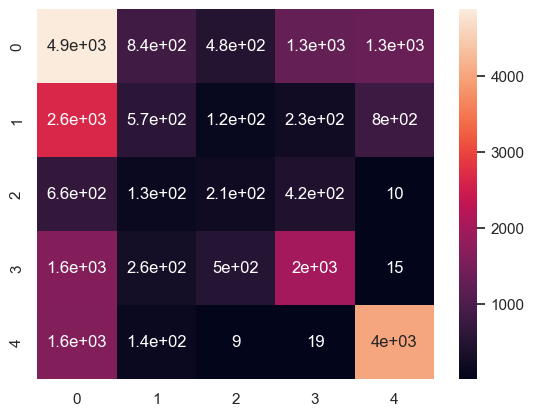

In [27]:
cm1 = confusion_matrix(y,y_pred)
sns.heatmap(cm1, annot=True)
print("\n Classification report\n")
print(classification_report(y,y_pred))

## KNeighborsClassifier

In [28]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(n_neighbors=4,algorithm='ball_tree')
kn_clf = kn.fit(X_train,y_train)
X_train_predict = kn.predict(X_train)
training_data_accuracy = accuracy_score(X_train_predict, y_train)
print("Train accuracy is : ", training_data_accuracy)

Train accuracy is :  0.5525699991930929


In [29]:
y_pred = kn.predict(X_test)
y=y_test
test_data_accuracy = accuracy_score(y,y_pred)
print("Test accuracy is : ", test_data_accuracy)

Test accuracy is :  0.4597353344630033



 Classification report

              precision    recall  f1-score   support

           0       0.43      0.54      0.48      8797
           1       0.28      0.26      0.27      4362
           2       0.18      0.09      0.12      1422
           3       0.52      0.42      0.47      4413
           4       0.64      0.61      0.63      5792

    accuracy                           0.46     24786
   macro avg       0.41      0.38      0.39     24786
weighted avg       0.46      0.46      0.45     24786



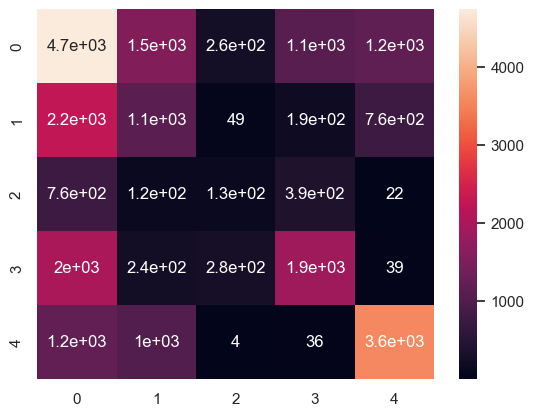

In [30]:
cm2 = confusion_matrix(y,y_pred)
sns.heatmap(cm2, annot=True)
print("\n Classification report\n")
print(classification_report(y,y_pred))

## Random Forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rf_clf = rfc.fit(X_train,y_train)
rf_clf
y_pred = rf_clf.predict(X_test)

In [32]:
X_train_predict = rfc.predict(X_train)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
training_data_accuracy = accuracy_score(X_train_predict, y_train)
print("Train accuracy: ", training_data_accuracy)

Train accuracy:  0.7307754377471153


In [33]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.49782135076252726


              precision    recall  f1-score   support

           0       0.44      0.59      0.50      8797
           1       0.33      0.13      0.19      4362
           2       0.19      0.07      0.10      1422
           3       0.55      0.55      0.55      4413
           4       0.66      0.70      0.68      5792

    accuracy                           0.50     24786
   macro avg       0.43      0.41      0.40     24786
weighted avg       0.47      0.50      0.47     24786



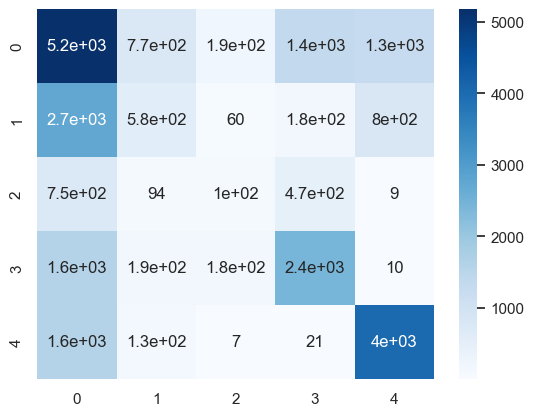

In [34]:
print(classification_report(y_test, y_pred))
cm3 = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm3, annot=True, cmap='Blues')

In [35]:
df.head()

,covid_19_deaths,total_deaths,pneumonia_deaths,pneumonia_and_covid_19_deaths,influenza_deaths,pneumonia__influenza__or_covid_19_deaths,age_group_new
0,1127855,11051061,1092804,562258,21520,1677497,0
1,476,64866,912,83,58,1361,4
2,1596,115515,2557,403,467,4195,4
3,263,12468,574,63,160,926,4
4,482,19428,718,138,201,1252,4


In [41]:
import psycopg2
con =  psycopg2.connect(host='localhost',
                          user= 'postgres',
                          password= '12345',
                          database= 'covid19_deaths_in_US')

In [42]:
cur = con.cursor()
cur.execute("CREATE TABLE IF NOT EXISTS covid19_deaths_in_US (covid_19_deaths TEXT, total_deaths TEXT, pneumonia_deaths TEXT, pneumonia_and_covid_19_deaths TEXT, influenza_deaths TEXT, pneumonia__influenza__or_covid_19_deaths TEXT, age_group_new TEXT)")
con.commit()

In [43]:
df['covid_19_deaths'] = df['covid_19_deaths'].astype(str)
df['total_deaths'] = df['total_deaths'].astype(str)
df['pneumonia_deaths'] = df['pneumonia_deaths'].astype(str)
df['pneumonia_and_covid_19_deaths'] = df['pneumonia_and_covid_19_deaths'].astype(str)
df['influenza_deaths'] = df['influenza_deaths'].astype(str)
df['pneumonia__influenza__or_covid_19_deaths'] = df['pneumonia__influenza__or_covid_19_deaths'].astype(str)
df['age_group_new'] = df['age_group_new'].astype(str)

In [47]:
for index, row in df.iterrows():
    cur.execute("INSERT INTO covid19_deaths_in_US (covid_19_deaths, total_deaths, pneumonia_deaths, pneumonia_and_covid_19_deaths, influenza_deaths, pneumonia__influenza__or_covid_19_deaths, age_group_new) VALUES (%s, %s, %s, %s, %s, %s, %s)",
                (row['covid_19_deaths'], row['total_deaths'], row['pneumonia_deaths'], row['pneumonia_and_covid_19_deaths'], row['influenza_deaths'], row['pneumonia__influenza__or_covid_19_deaths'], row['age_group_new']))
    
# Commit the changes to the database and close the connection
con.commit()
cur.close()


In [48]:
df.dtypes

covid_19_deaths                             object
total_deaths                                object
pneumonia_deaths                            object
pneumonia_and_covid_19_deaths               object
influenza_deaths                            object
pneumonia__influenza__or_covid_19_deaths    object
age_group_new                               object
dtype: object